In [5]:
import os
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import numpy as np
from PIL import ImageOps


# Define PyTorch preprocessing transformations
torch_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize to ImageNet stats
                         #std=[0.229, 0.224, 0.225])
])

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [2]:
# Input and output folder paths
image_folder = "/raid/home/somayeh.shami/project/somayeh_workspace/Crack_project/thirdtry/Ali_images"
patches_folder = "/raid/home/somayeh.shami/project/somayeh_workspace/Crack_project/thirdtry/patches"

# Ensure the output folder exists
os.makedirs(patches_folder, exist_ok=True)

In [3]:
def segment_and_preprocess_image(img, patch_size=(128, 128)):
    patches = []
    img_width, img_height = img.size
    patch_width, patch_height = patch_size
    
    for i in range(0, img_width - patch_width + 1, patch_width):
        for j in range(0, img_height - patch_height + 1, patch_height):
            # Crop patch
            box = (i, j, i + patch_width, j + patch_height)
            patch = img.crop(box)
            
            # Convert to tensor without normalization
            patch_tensor = torch_transforms(patch)
            patches.append(patch_tensor)
    
    return patches

In [ ]:
# Process images and save patches
for img_path in os.listdir(image_folder):
    full_img_path = os.path.join(image_folder, img_path)
    
    # Open the image
    img = Image.open(full_img_path).convert("RGB")
    
    # Segment and preprocess the image
    patches = segment_and_preprocess_image(img, patch_size=(128, 128))
    
    # Save each patch
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    patch_count = 0
    for idx, patch_tensor in enumerate(patches):
        # Convert tensor back to image
        patch_img = transforms.ToPILImage()(patch_tensor)  # No need for denormalization
        patch_img.save(os.path.join(patches_folder, f"{base_name}_patch_{idx}.jpg"))
        
        patch_count += 1
    
    # Print the number of patches per image
    print(f"Image: {base_name}, Number of patches: {patch_count}")

print(f"All patches saved to: {patches_folder}")

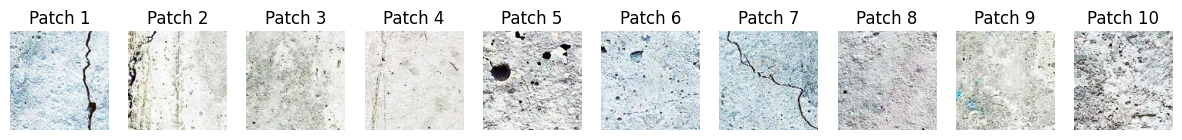

In [6]:
# Display patches
def display_patches(patches_folder, num_patches=10):
    patch_files = [os.path.join(patches_folder, file) for file in os.listdir(patches_folder)][:num_patches]
    
    plt.figure(figsize=(15, 10))
    for i, patch_path in enumerate(patch_files):
        patch = Image.open(patch_path)
        plt.subplot(1, num_patches, i + 1)
        plt.imshow(patch)
        plt.title(f"Patch {i+1}")
        plt.axis("off")
    plt.show()

display_patches(patches_folder)

In [ ]:
# Define normalization for training
normalize_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for model compatibility
])